In [2]:
import pandas as pd
import contactMap as cm
from PDBHelper import PDBEntitiesClass

PATH = './data/' #this is where you can find the adjacency files
ann_file = './data/SH2_containing_structures_ann_witharchitecture.csv' #this is the annotation file


PDB_ID = '2SHP' #example, 2SHP is the tyrosine phosphatase SHP/PTPN11

ann = pd.read_csv(ann_file)
entities = PDBEntitiesClass(ann, '2SHP')
entity =1 #there's only one entity in this example
pdbClass = entities.pdb_dict[entity] #this holds information about the protein crystalized, such as domains




In [3]:
PDB_ID = '2SHP'
chain = 'A'
chain_A = cm.chainMap(PDB_ID, chain)
chain_A.construct(PATH, 5)

In [4]:
print(chain_A.structSeq)
print(chain_A.return_min_residue())
print(len(chain_A.resNums))
print(chain_A.arr.shape)
print(chain_A.unmodeled_list)

KSRRWFHPNITGVEAENLLLTRGVDGSFLARPSKSNPGDLTLSVRRNGAVTHIKIQNTGDYYDLYGGEKFATLAELVQYYMEHHGQLKEKNGDVIELKYPLNCADPTSERWFHGHLSGKEAEKLLTEKGKHGSFLVRESQSHPGDFVLSVRTGD-----NDGKSKVTHVMIRCQELKYDVGGGERFDSLTDLVEHYKKNPMVETLGTVLQLKQPLNTTRINAAEIESRVRELSK----------GFWEEFETLQQQECKLLYSRKEGQRQENKNKNRYKNILPFDHTRVVLHD-------SDYINANIIMP-----------KKSYIATQGCLQNTVNDFWRMVFQENSRVIVMTTKEVERGKSKCVKYWPDEYALKEYGVMRVRNVKESAAHDYTLRELKLSKVGQGNTERTVWQYHFRTWPDHGVPSDPGGVLDFLEEVHHKQESIMDAGPVVVHCSAGIGRTGTFIVIDILIDIIREKGVDCDIDVPKTIQMVRSQRSGMVQTEAQYRSIYMAVQHYIETL
2
524
(524, 524)
[156, 160, 236, 245, 295, 301, 313, 323]


In [9]:
print(pdbClass.ref_seq_mutated)
print(pdbClass.ref_seq_positions[0])
print(len(pdbClass.ref_seq_mutated))

MKSRRWFHPNITGVEAENLLLTRGVDGSFLARPSKSNPGDLTLSVRRNGAVTHIKIQNTGDYYDLYGGEKFATLAELVQYYMEHHGQLKEKNGDVIELKYPLNCADPTSERWFHGHLSGKEAEKLLTEKGKHGSFLVRESQSHPGDFVLSVRTGDDKGESNDGKSKVTHVMIRCQELKYDVGGGERFDSLTDLVEHYKKNPMVETLGTVLQLKQPLNTTRINAAEIESRVRELSKLAETTDKVKQGFWEEFETLQQQECKLLYSRKEGQRQENKNKNRYKNILPFDHTRVVLHDGDPNEPVSDYINANIIMPEFETKCNNSKPKKSYIATQGCLQNTVNDFWRMVFQENSRVIVMTTKEVERGKSKCVKYWPDEYALKEYGVMRVRNVKESAAHDYTLRELKLSKVGQGNTERTVWQYHFRTWPDHGVPSDPGGVLDFLEEVHHKQESIMDAGPVVVHCSAGIGRTGTFIVIDILIDIIREKGVDCDIDVPKTIQMVRSQRSGMVQTEAQYRSIYMAVQHYIETL
1
525


In [10]:
chain_A_aligned = cm.translate_chainMap_to_RefSeq(chain_A, pdbClass)

324
Adding 1 n_term positions


In [11]:
#These are the domains that are available in the structure for analysis
pdbClass.domains

{0: {'SH2': [6, 102, 0, 1]},
 1: {'SH2': [112, 216, 0, 0]},
 2: {'Y_phosphatase': [247, 517, 4, 1]}}

In [12]:
ROI_1 = [6, 102] #n_term SH2 domain 
ROI_2 = [247, 517] #PTP domain
fastaHeader = 'SHP2|N_SH2'

In [13]:
chain_A_aligned.print_fasta_feature_files(ROI_1[0], ROI_1[1], ROI_2[0], ROI_2[1], fastaHeader, 'SH2N_PTP', 'SH2Test2_new', append=False, use_ref_seq_aligned=True)

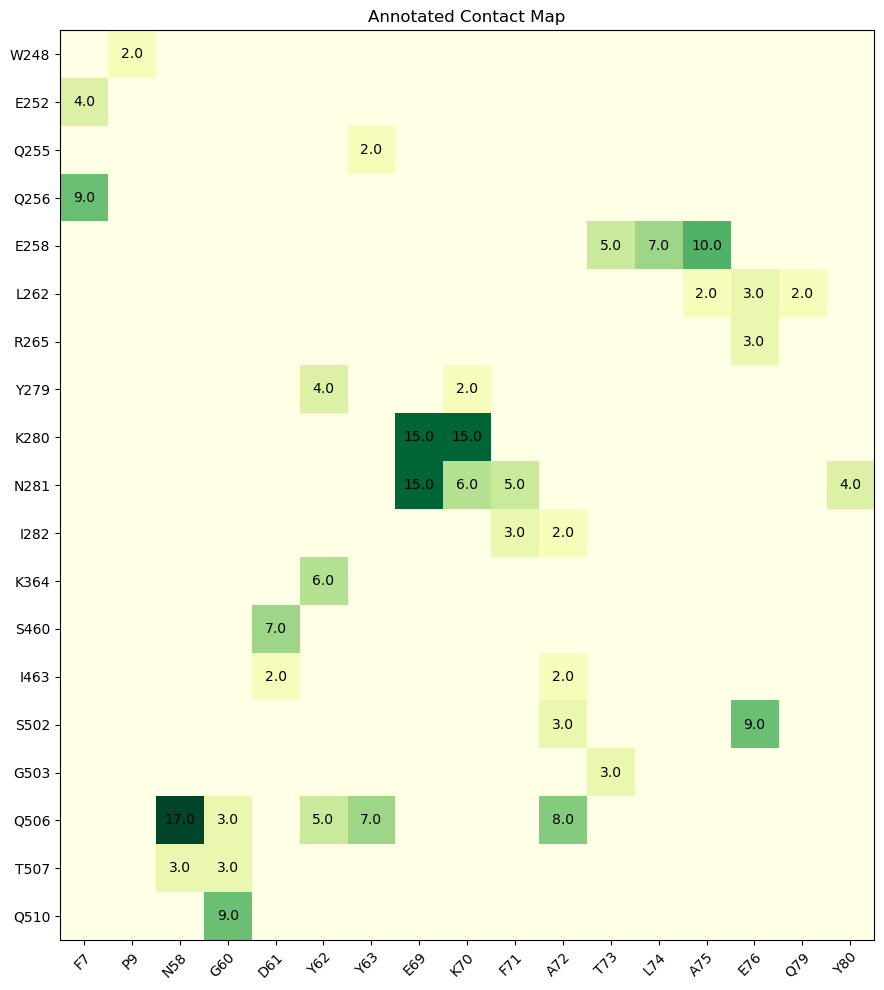

In [15]:
chain_A_aligned.generateAnnotatedHeatMap(ROI_2[0], ROI_2[1], ROI_1[0], ROI_1[1], remove_no_contacts=True)

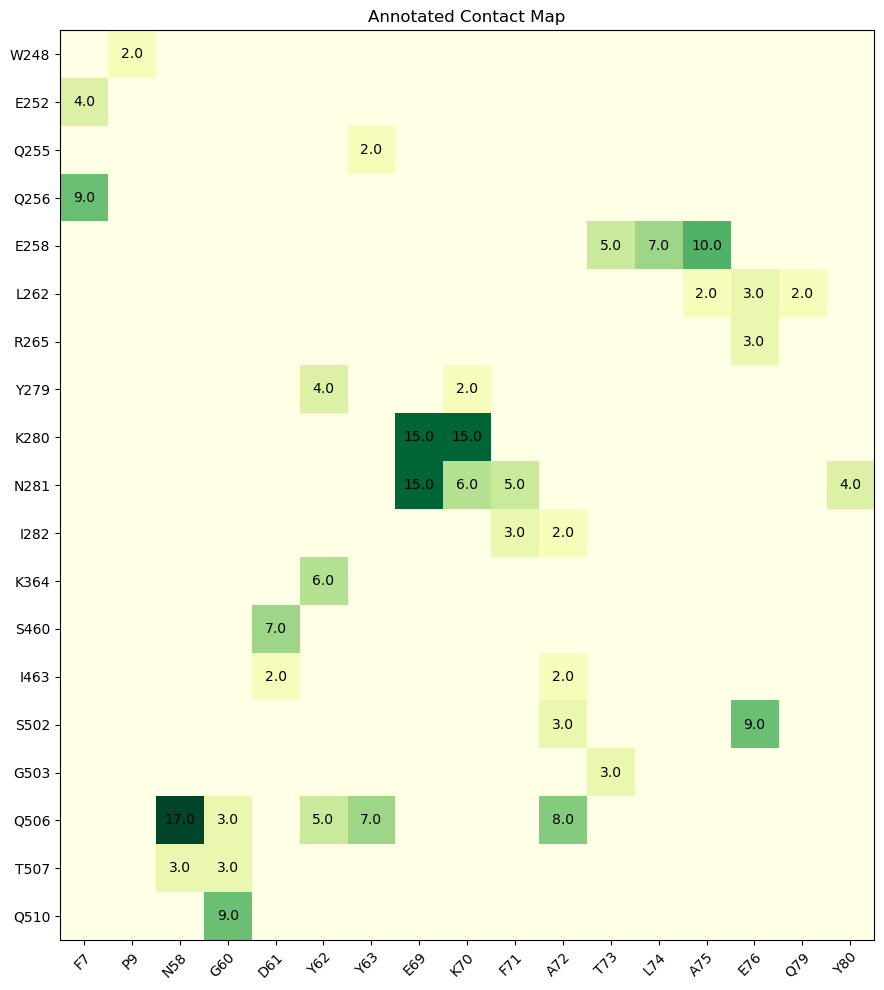

In [16]:
chain_A_aligned.generateAnnotatedHeatMap(ROI_2[0], ROI_2[1], ROI_1[0], ROI_1[1], remove_no_contacts=True)